In [1]:
import numpy as np

In [2]:
import pandas as pd
df_fuel_mix = pd.read_csv('data/eia_fuel_mix_hourly_.csv')
df_weather = pd.read_excel('Weather_data_full.xlsx')
df_hourly_load = pd.read_csv('data/eia_regional_hourly_.csv')

In [3]:
import pandas as pd
import os

folder_path = 'flight_data/'
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December', 'January_22', 'February_22', 'March_22', 'April_22', 
          'May_22', 'June_22', 
          'July_22', 'August_22', 'September_22', 'October_22', 'November_21', 'December_21']

dataframes = []
for month in months:
    file_path = os.path.join(folder_path, f'T_ONTIME_REPORTING_{month}.csv')
    df = pd.read_csv(file_path)
    dataframes.append(df)

df_flight = pd.concat(dataframes, ignore_index=True)


In [4]:

top_origin_cities = df_flight['ORIGIN_CITY_NAME'].value_counts().head(11).iloc[1:]
top_dest_cities = df_flight['DEST_CITY_NAME'].value_counts().head(11).iloc[1:]


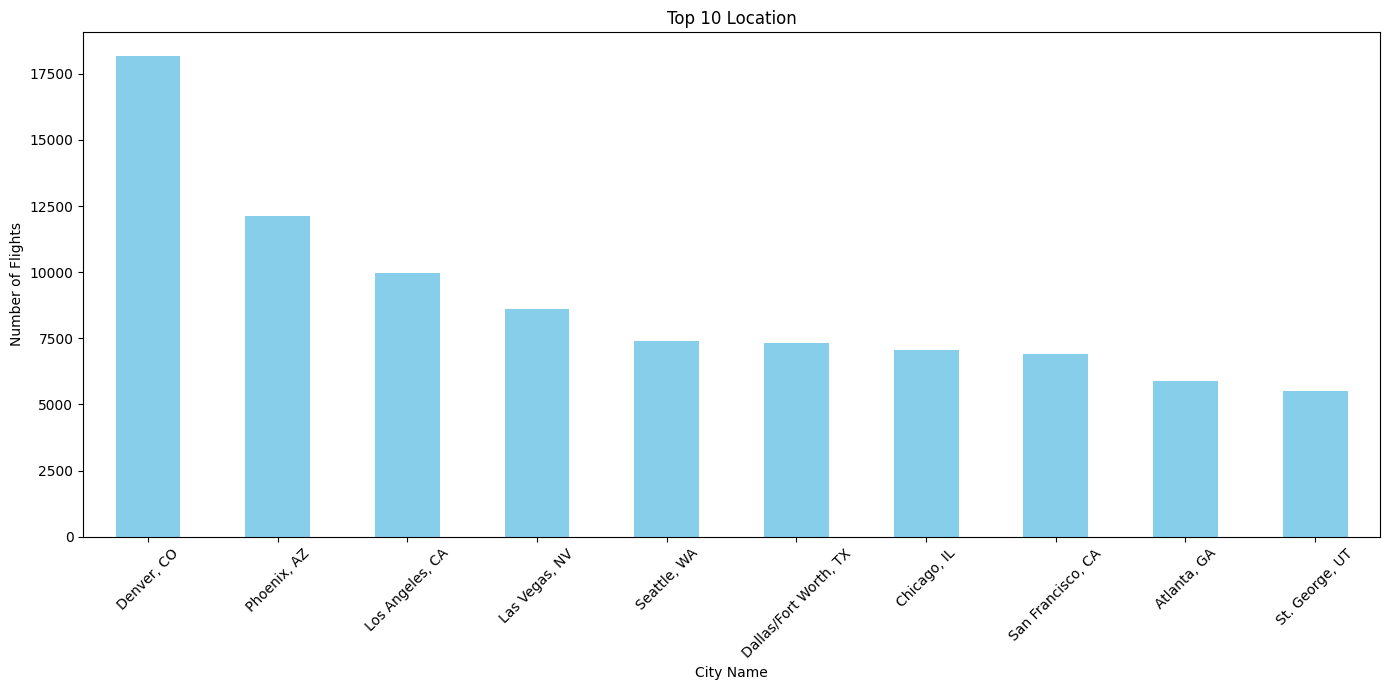

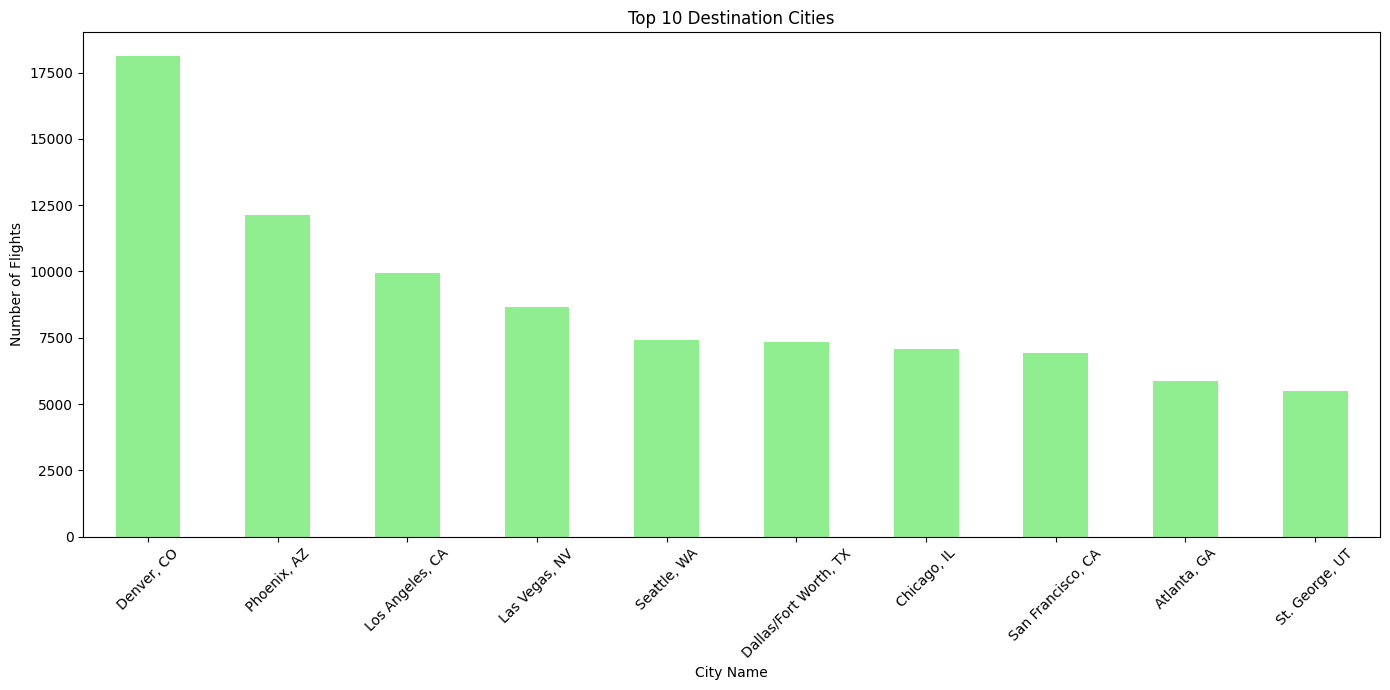

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))
top_origin_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Location')
plt.xlabel('City Name')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


plt.figure(figsize=(14, 7))
top_dest_cities.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Destination Cities')
plt.xlabel('City Name')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
df_flight

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,...,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,DIV_DISTANCE
0,1/1/2023 12:00:00 AM,ABQ,"Albuquerque, NM",New Mexico,SLC,"Salt Lake City, UT",Utah,538.0,-2.0,726.0,...,0.0,78.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023 12:00:00 AM,ABQ,"Albuquerque, NM",New Mexico,SLC,"Salt Lake City, UT",Utah,1247.0,7.0,1422.0,...,0.0,74.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2023 12:00:00 AM,ATL,"Atlanta, GA",Georgia,SLC,"Salt Lake City, UT",Utah,809.0,4.0,1021.0,...,0.0,224.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023 12:00:00 AM,ATL,"Atlanta, GA",Georgia,SLC,"Salt Lake City, UT",Utah,1024.0,19.0,1250.0,...,0.0,221.0,1590.0,19.0,0.0,10.0,0.0,0.0,NaN,NaN
4,1/1/2023 12:00:00 AM,ATL,"Atlanta, GA",Georgia,SLC,"Salt Lake City, UT",Utah,1151.0,6.0,1411.0,...,0.0,235.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455140,12/31/2021 12:00:00 AM,TUS,"Tucson, AZ",Arizona,SLC,"Salt Lake City, UT",Utah,649.0,-4.0,827.0,...,0.0,79.0,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455141,12/31/2021 12:00:00 AM,TUS,"Tucson, AZ",Arizona,SLC,"Salt Lake City, UT",Utah,1307.0,41.0,1507.0,...,0.0,83.0,601.0,0.0,42.0,0.0,0.0,0.0,NaN,NaN
455142,12/31/2021 12:00:00 AM,TWF,"Twin Falls, ID",Idaho,SLC,"Salt Lake City, UT",Utah,1343.0,18.0,1443.0,...,0.0,38.0,175.0,0.0,20.0,0.0,0.0,0.0,NaN,NaN
455143,12/31/2021 12:00:00 AM,VEL,"Vernal, UT",Utah,DEN,"Denver, CO",Colorado,NaN,NaN,NaN,...,0.0,NaN,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

df_fuel_mix['interval_start_utc'] = pd.to_datetime(df_fuel_mix['interval_start_utc'])

df_fuel_mix['date'] = df_fuel_mix['interval_start_utc'].dt.date
df_fuel_mix.drop(columns=['interval_start_utc', 'interval_end_utc'], inplace=True)

df_hourly_load['interval_start_utc'] = pd.to_datetime(df_hourly_load['interval_start_utc'])
df_hourly_load['date'] = df_hourly_load['interval_start_utc'].dt.date
df_hourly_load.drop(columns=['interval_start_utc', 'interval_end_utc'], inplace=True)

In [8]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])


In [9]:
df_flight['FL_DATE'] = pd.to_datetime(df_flight['FL_DATE'])

C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\2065551519.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_flight['FL_DATE'] = pd.to_datetime(df_flight['FL_DATE'])


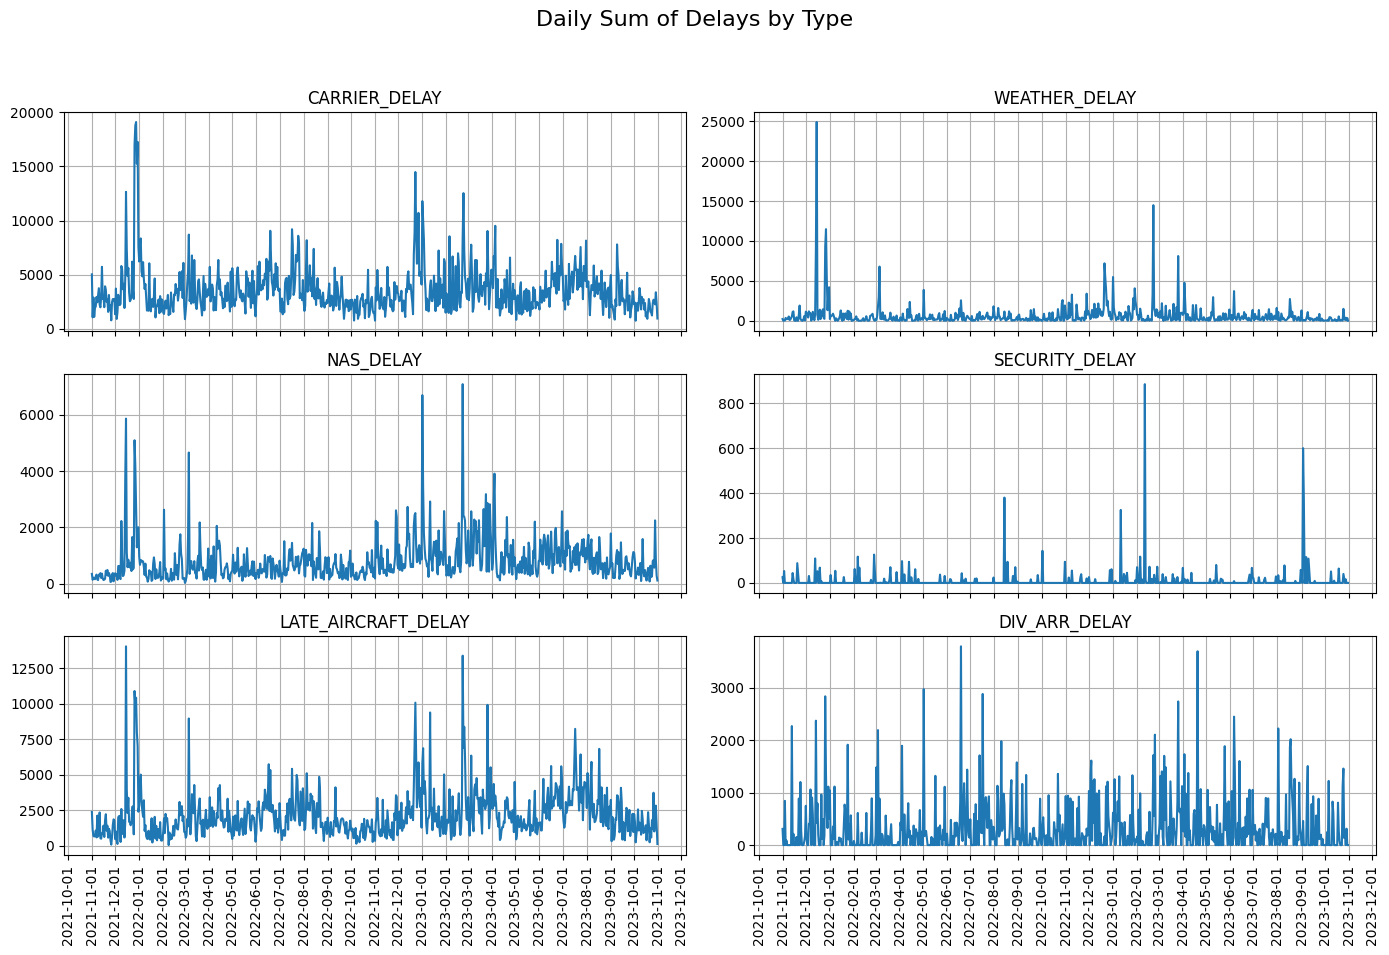

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Grouping the data by date and summing the delays
daily_delays = df_flight.groupby('FL_DATE').sum()[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_ARR_DELAY']]


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True)
fig.suptitle('Daily Sum of Delays by Type', fontsize=16)


axes = axes.flatten()


delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_ARR_DELAY']

# Loop through the delay types and create a line plot for each
for i, delay_type in enumerate(delay_types):
    axes[i].plot(daily_delays.index, daily_delays[delay_type])
    axes[i].set_title(delay_type)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  

plt.show()


Creating number of flight data

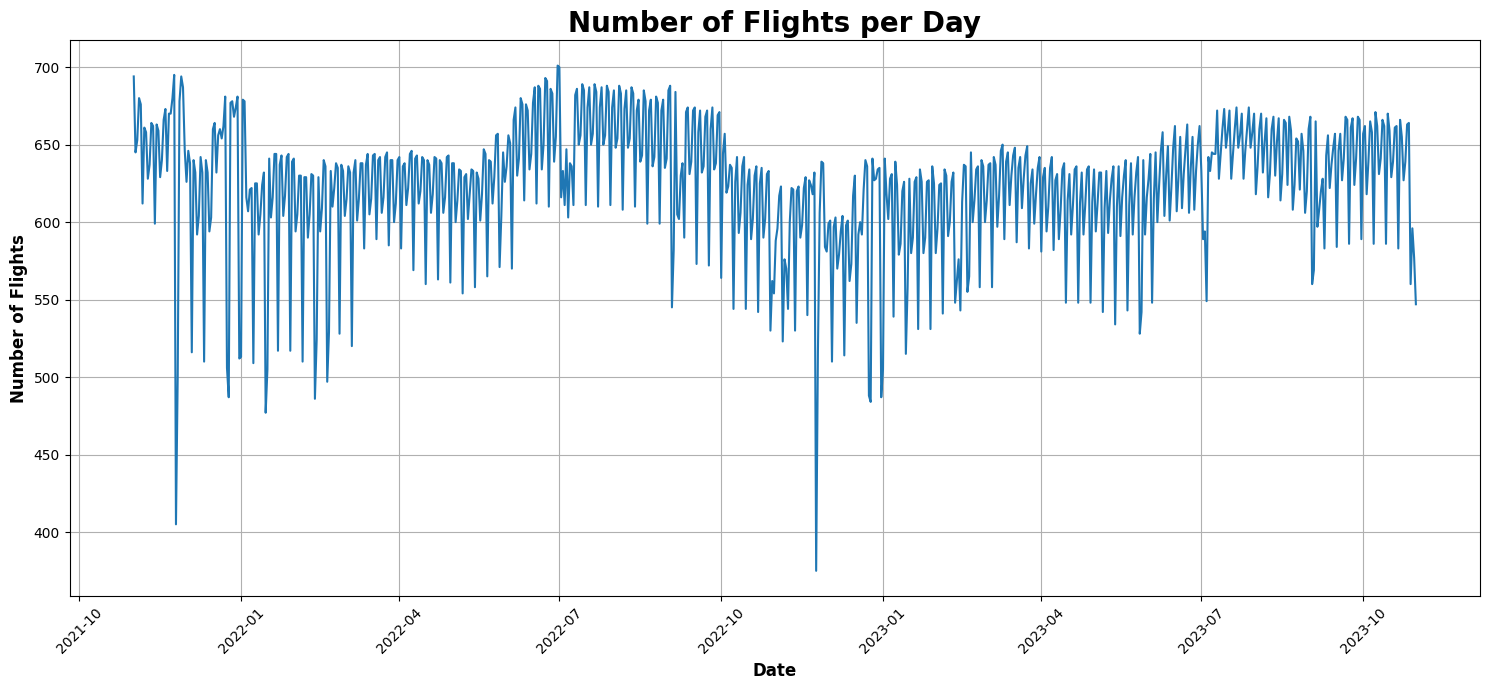

In [11]:

df_flight['Date'] = df_flight['FL_DATE'].dt.date

# Group by the new Date column and count the flights per day
flight_counts = df_flight.groupby('Date').size().reset_index(name='Number of Flights')

flight_counts['Date'] = pd.to_datetime(flight_counts['Date'])

import matplotlib.pyplot as plt


plt.figure(figsize=(15, 7)) 
plt.plot(flight_counts['Date'], flight_counts['Number of Flights'])  
plt.title('Number of Flights per Day', fontsize=20, weight='bold')  
plt.xlabel('Date', fontsize=12, weight='bold')  
plt.ylabel('Number of Flights', fontsize=12, weight='bold') 
plt.grid(True)  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  

Delay type

In [12]:
df_weather['Snow Depth'] = pd.to_numeric(df_weather['Snow Depth'], errors='coerce').fillna(0.00001)

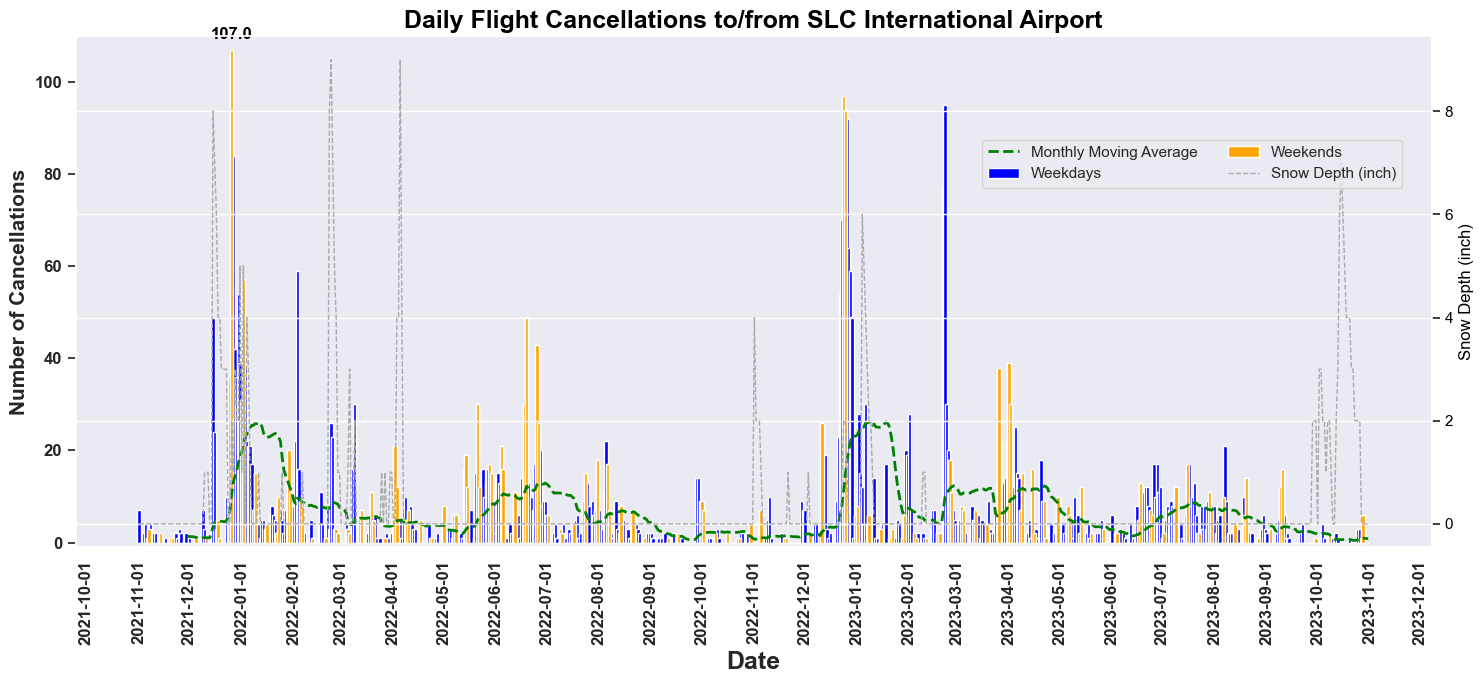

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import matplotlib.dates as mdates
import seaborn as sns


cancellations_per_day = df_flight.groupby('FL_DATE')['CANCELLED'].sum() # checking how many cancellation are there in each day
sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(15, 7)) 


is_weekend = cancellations_per_day.index.weekday >= 5
weekends = cancellations_per_day.index[is_weekend]

ax1.bar(cancellations_per_day.index, cancellations_per_day.values, color='blue', label='Weekdays', width=2)
ax1.bar(weekends, cancellations_per_day[is_weekend], color='orange', label='Weekends', width=2)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  


window_value = 5
rolling_mean = cancellations_per_day.rolling(window=window_value).mean()
rolling_mean_months = cancellations_per_day.rolling(window=30).mean()


max_cancellations = cancellations_per_day.max()
high_cancellation_days = cancellations_per_day[cancellations_per_day == max_cancellations]

for day in high_cancellation_days.index:
    plt.annotate(f'{max_cancellations}', 
                 (mdates.date2num(day), max_cancellations), 
                 textcoords="offset points", 
                 xytext=(0,8), 
                 ha='center',
                 color='black',
                 weight='bold')

#ax1.plot(rolling_mean.index, rolling_mean.values, color='red', label=f'{window_value}-Day Moving Average')
ax1.plot(rolling_mean_months.index, rolling_mean_months.values, color='green', linestyle='--', label=f'Monthly Moving Average',linewidth=2)
plt.ylabel('Number of Cancellations',fontsize=15,weight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.yticks(fontsize=12, weight='bold')
plt.ylim(-1, 110)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=12, weight='bold') 
#plt.legend(fontsize=15)

ax2 = ax1.twinx()

ax2.plot(rolling_mean_months.index, df_weather['Snow Depth'], color='darkgrey', linestyle='--', label='Snow Depth (inch)', linewidth=1)

ax2.set_ylabel('Snow Depth (inch)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend()

# ax2.set_ylim([min_value, max_value])
plt.title('Daily Flight Cancellations to/from SLC International Airport',fontsize=18,weight='bold',color='Black')




handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


handles = handles1 + handles2
labels = labels1 + labels2


# Create a single legend with bbox_to_anchor
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=2)



ax1.grid()


plt.tight_layout() 



In [14]:

cancellations_per_day_df = cancellations_per_day.reset_index()
cancellations_per_day_df.columns = ['Date', 'Cancellations']
cancellations_per_day_df['Date'] = pd.to_datetime(cancellations_per_day_df['Date'])


df_combined = pd.merge(df_weather, cancellations_per_day_df, on='Date', how='inner')


In [15]:
print(df_weather[df_weather['Date'] == '2023-09-01'])
#print(cancellations_per_day_df[cancellations_per_day_df['Date'] == '2023-09-01'])

          Date  Max Temp  Min Temp  Avg Temp  Departure  HDD  CDD  \
304 2023-09-01        85        71      78.0        3.6    0   13   

    Precipitation New Snow  Snow Depth  
304             T        0         0.0  


Filling Missing Values

In [16]:

def fill_missing_with_neighbors_mean(series):

    for i in range(1, len(series) - 1):
   
        if pd.isna(series.iloc[i]):
      
            neighbors_mean = np.mean([series.iloc[i - 1], series.iloc[i + 1]])
            series.iloc[i] = neighbors_mean
    return series


columns_to_fill = ['Max Temp', 'Min Temp', 'Avg Temp', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']

for column in columns_to_fill:

    if pd.api.types.is_numeric_dtype(df_combined[column]):
        df_combined[column] = fill_missing_with_neighbors_mean(df_combined[column])


In [17]:
df_combined

,Date,Max Temp,Min Temp,Avg Temp,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Cancellations
0,2021-11-01,63,46,54.5,6.7,10,0,0,0,0.00000,7.0
1,2021-11-02,58,44,51.0,3.7,14,0,0.06,0,0.00000,0.0
2,2021-11-03,58,40,49.0,2.1,16,0,0,0,0.00000,0.0
3,2021-11-04,67,39,53.0,6.5,12,0,0,0,0.00000,2.0
4,2021-11-05,66,41,53.5,7.4,11,0,0,0,0.00000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
725,2022-12-27,55,32,43.5,12.9,21,0,0.16,0,0.00001,64.0
726,2022-12-28,40,34,37.0,6.4,28,0,0.34,1,0.00001,59.0
727,2022-12-29,40,32,36.0,5.4,29,0,T,T,0.00000,49.0
728,2022-12-30,43,35,39.0,8.4,26,0,0.06,0,0.00000,1.0


In [18]:
df_combined_load = df_combined.copy()

df_combined_load['load'] = df_hourly_load['load']

Pearson Correlation

In [19]:

df_combined['Precipitation'] = pd.to_numeric(df_combined['Precipitation'], errors='coerce').fillna(0.00001)
df_combined['New Snow'] = pd.to_numeric(df_combined['New Snow'], errors='coerce').fillna(0.00001)
df_combined['Snow Depth'] = pd.to_numeric(df_combined['Snow Depth'], errors='coerce').fillna(0.00001)


df_combined_load['Precipitation'] = pd.to_numeric(df_combined_load['Precipitation'], errors='coerce').fillna(0.00001)
df_combined_load['New Snow'] = pd.to_numeric(df_combined_load['New Snow'], errors='coerce').fillna(0.00001)
df_combined_load['Snow Depth'] = pd.to_numeric(df_combined_load['Snow Depth'], errors='coerce').fillna(0.00001)
#df_combined_load['load'] = pd.to_numeric(df_combined_load['load'], errors='coerce').fillna(0.00001)


correlation_matrix = df_combined_load.select_dtypes(include=[np.number]).corr()


correlations_with_cancellations = correlation_matrix['Cancellations'].sort_values()
print(correlations_with_cancellations)



Max Temp        -0.201479
Avg Temp        -0.190990
Min Temp        -0.174315
Departure       -0.098465
CDD             -0.065515
load            -0.045328
Precipitation    0.150103
HDD              0.233482
Snow Depth       0.325046
New Snow         0.340111
Cancellations    1.000000
Name: Cancellations, dtype: float64


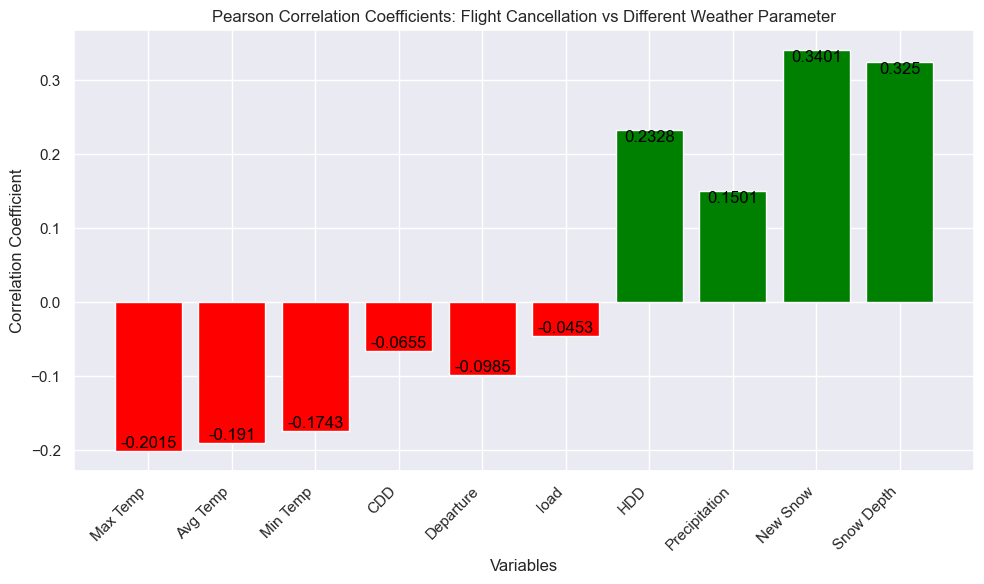

In [20]:
import matplotlib.pyplot as plt

# Given correlation data
correlations = {
    'Max Temp': -0.201479,
    'Avg Temp': -0.190990,
    'Min Temp': -0.174315,
    'CDD': -0.065515,
    'Departure': -0.098465,
    'load':-0.045328,
    'HDD': 0.232770,
    'Precipitation':  0.150103,
    'New Snow': 0.340111,
    'Snow Depth':0.325046
}


variables = list(correlations.keys())


values = list(correlations.values())


plt.figure(figsize=(10, 6))
bars = plt.bar(variables, values, color=['red' if v < 0 else 'green' for v in values])


plt.title('Pearson Correlation Coefficients: Flight Cancellation vs Different Weather Parameter')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')


plt.xticks(rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom' if yval < 0 else 'top', color='black')


plt.tight_layout()
plt.show()


In [21]:
correlations_with_cancellations = correlation_matrix['load'].sort_values()
print(correlations_with_cancellations)

HDD             -0.087643
Cancellations   -0.045328
Snow Depth       0.015368
Precipitation    0.020895
Departure        0.022380
New Snow         0.039232
Max Temp         0.124548
Avg Temp         0.136121
Min Temp         0.147808
CDD              0.189816
load             1.000000
Name: load, dtype: float64


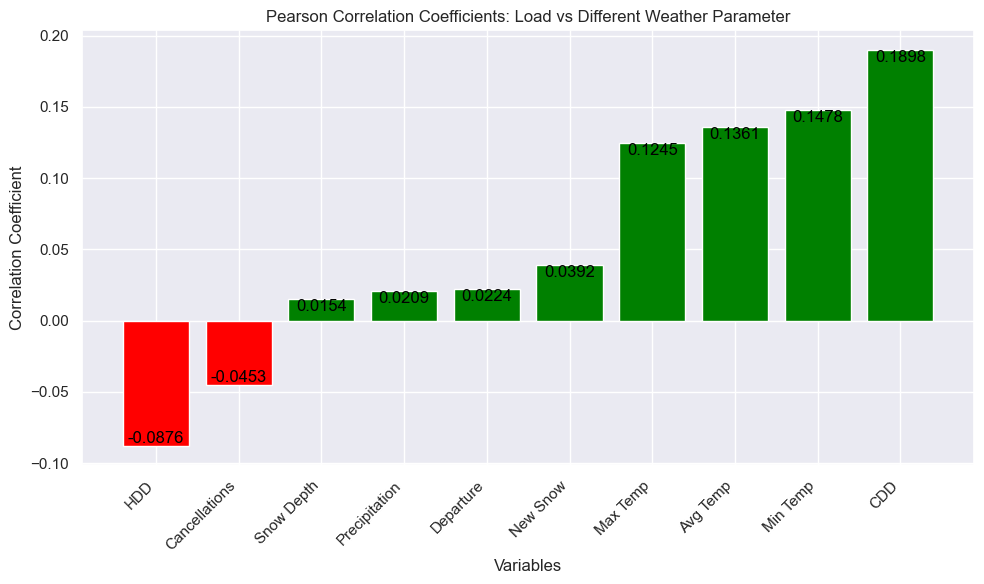

In [22]:

correlations = {
    'HDD': -0.087643,
    'Cancellations': -0.045328,
    'Snow Depth': 0.015368,
    'Precipitation': 0.020895,
    'Departure': 0.022380,
    'New Snow': 0.039232,
    'Max Temp': 0.124548,
    'Avg Temp': 0.136121,
    'Min Temp': 0.147808,
    'CDD': 0.189816
}



variables = list(correlations.keys())


values = list(correlations.values())


plt.figure(figsize=(10, 6))
bars = plt.bar(variables, values, color=['red' if v < 0 else 'green' for v in values])


plt.title('Pearson Correlation Coefficients: Load vs Different Weather Parameter')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')


plt.xticks(rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom' if yval < 0 else 'top', color='black')


plt.tight_layout()
plt.show()


Delays

In [23]:
"""
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_flight_plotting is already prepared with 'FL_DATE' as the datetime index

# Create the plot
plt.figure(figsize=(15, 7))

# Plotting departure delays using scatter plot for better distinction
plt.scatter(df_flight_plotting.index, df_flight_plotting['DEP_DELAY'], label='Departure Delay', color='blue', alpha=0.2, s=100)
plt.scatter(df_flight_plotting.index, df_flight_plotting['ARR_DELAY'], label='Arrival Delay', color='red', alpha=0.6, s=10)

# Plotting arrival delays using line plot
#plt.plot(df_flight_plotting.index, df_flight_plotting['ARR_DELAY'], label='Arrival Delay', color='red', linewidth=0.5)

# Setting the title and labels
plt.title('Flight Departure and Arrival Delays Over Time', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=16, weight='bold')
plt.ylabel('Delay (minutes)', fontsize=16, weight='bold')

# Formatting the x-axis with dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Using MonthLocator for less crowded x-axis labels
plt.xticks(rotation=45)  # Rotate the dates for better readability

# Adding a legend
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\n\n# Assuming df_flight_plotting is already prepared with 'FL_DATE' as the datetime index\n\n# Create the plot\nplt.figure(figsize=(15, 7))\n\n# Plotting departure delays using scatter plot for better distinction\nplt.scatter(df_flight_plotting.index, df_flight_plotting['DEP_DELAY'], label='Departure Delay', color='blue', alpha=0.2, s=100)\nplt.scatter(df_flight_plotting.index, df_flight_plotting['ARR_DELAY'], label='Arrival Delay', color='red', alpha=0.6, s=10)\n\n# Plotting arrival delays using line plot\n#plt.plot(df_flight_plotting.index, df_flight_plotting['ARR_DELAY'], label='Arrival Delay', color='red', linewidth=0.5)\n\n# Setting the title and labels\nplt.title('Flight Departure and Arrival Delays Over Time', fontsize=20, weight='bold')\nplt.xlabel('Date', fontsize=16, weight='bold')\nplt.ylabel('Delay (minutes)', fontsize=16, weight='bold')\n\n# Formatting the x-axis with dates\nplt.gca().xaxis.set_major_for

Snow vs Load demand

In [24]:
df_weather.columns

Index(['Date', 'Max Temp', 'Min Temp', 'Avg Temp', 'Departure', 'HDD', 'CDD',
       'Precipitation', 'New Snow', 'Snow Depth'],
      dtype='object')

In [25]:
indices = df_hourly_load.index[df_hourly_load['load'] == 13483.375000]


for idx in indices:

    if idx > 0 and idx < len(df_hourly_load) - 1:
        prev_load = df_hourly_load.iloc[idx - 1]['load']
        next_load = df_hourly_load.iloc[idx + 1]['load']
        mean_load = (prev_load + next_load) / 2
        df_hourly_load.at[idx, 'load'] = mean_load

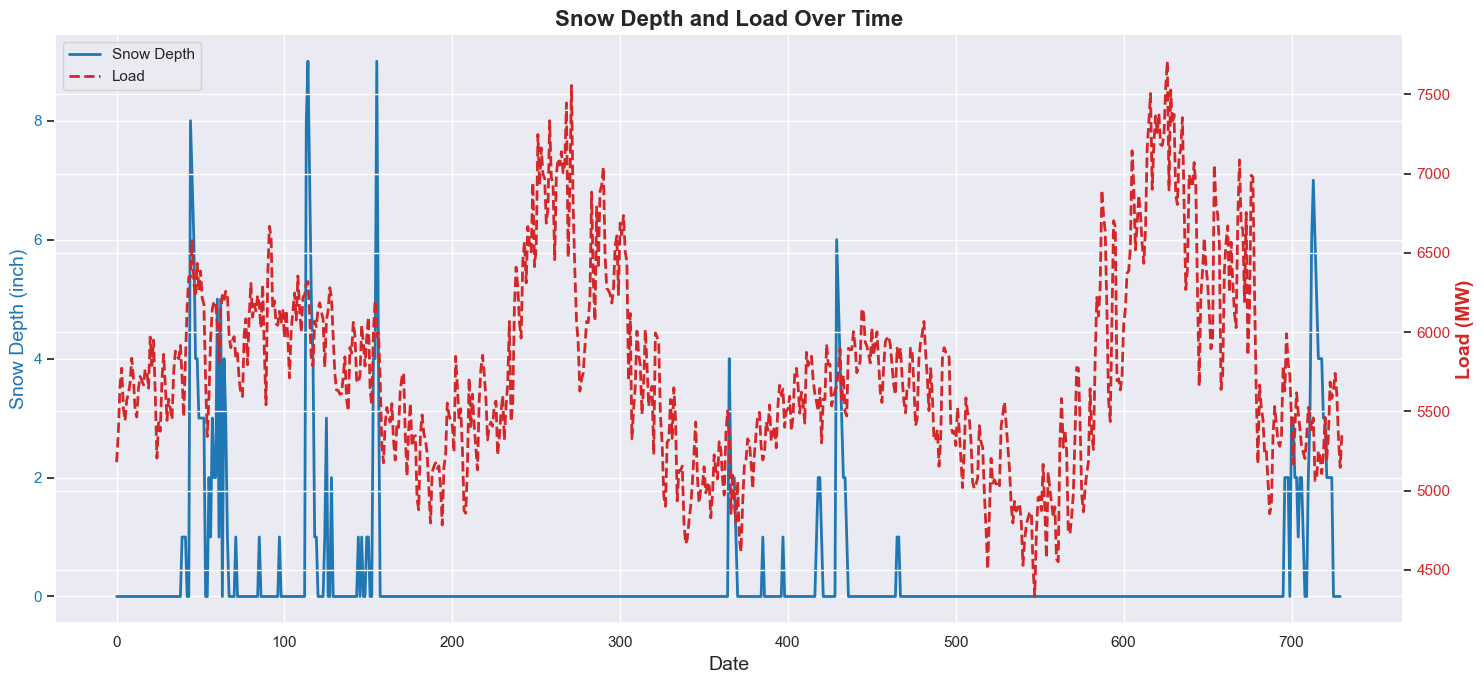

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")


fig, ax1 = plt.subplots(figsize=(15, 7))


color = 'tab:blue'
ax1.plot(df_weather.index, df_weather['Snow Depth'], color=color, label='Snow Depth', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Snow Depth (inch)', color=color, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df_hourly_load.index, df_hourly_load['load'], color=color, label='Load', linewidth=2, linestyle='--')
ax2.set_ylabel('Load (MW)', color=color, fontsize=14,  weight='bold')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Snow Depth and Load Over Time', fontsize=16, weight='bold')
fig.tight_layout()



lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate the dates 90 degrees for better readability


plt.show()


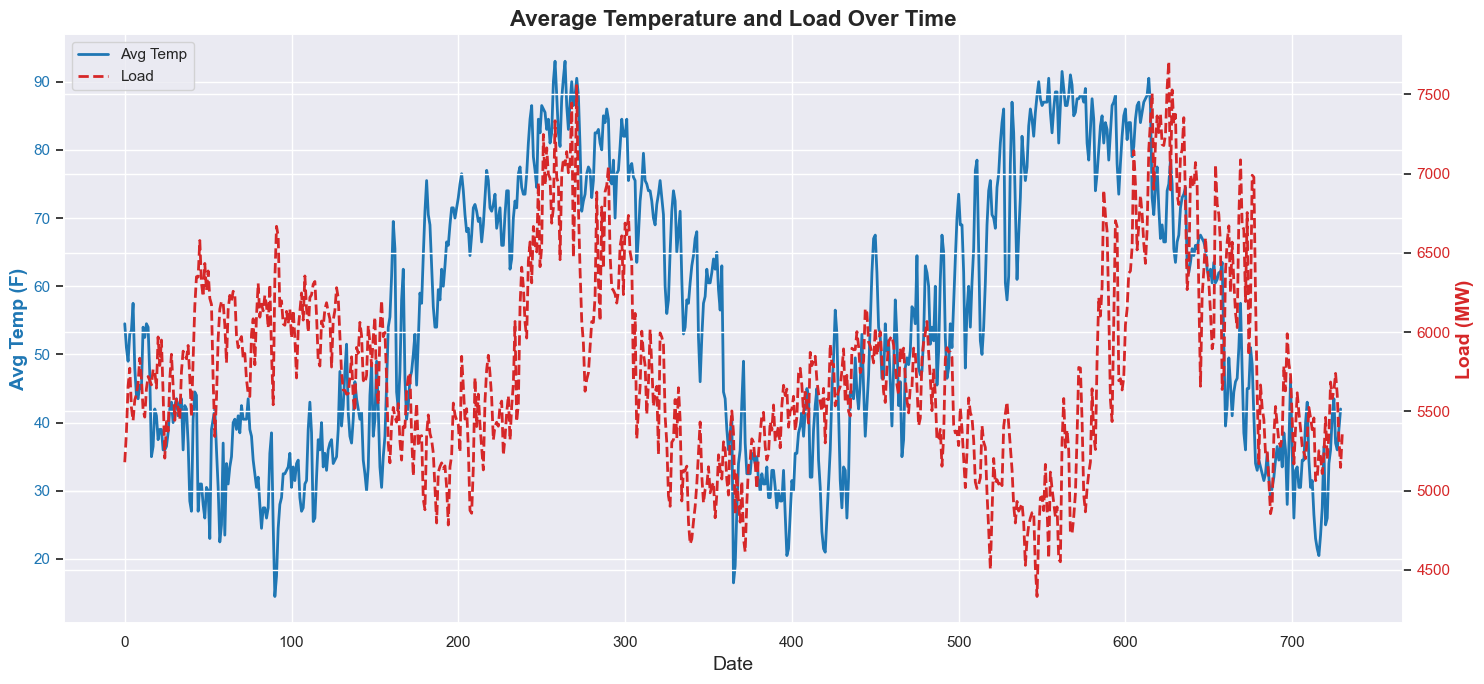

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

fig, ax1 = plt.subplots(figsize=(15, 7))


color = 'tab:blue'
ax1.plot(df_weather.index, df_weather['Avg Temp'], color=color, label='Avg Temp', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Avg Temp (F)', color=color, fontsize=14, weight='bold')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
#ax2.plot(df_hourly_load.index, df_hourly_load['load'], color=color, label='Load', linewidth=2, linestyle='--')
ax2.plot(df_hourly_load.index, df_hourly_load['load'], color=color, label='Load', linewidth=2, linestyle='--',
         )
ax2.set_ylabel('Load (MW)', color=color, fontsize=14, weight='bold')
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Average Temperature and Load Over Time', fontsize=16, weight='bold')
fig.tight_layout()


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)  # Rotate the dates 90 degrees for better readability


plt.show()


ML

In [28]:
df_combined = pd.concat([df_combined, df_hourly_load['load_forecast'], flight_counts['Number of Flights']], axis=1)

In [29]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

df_combined = df_combined.sort_values(by='Date')

In [30]:
df_combined

,Date,Max Temp,Min Temp,Avg Temp,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Cancellations,load_forecast,Number of Flights
0,2021-11-01,63.0,46.0,54.5,6.7,10.0,0.0,0.00,0.0,0.0,7.0,5323.800000,694.0
1,2021-11-02,58.0,44.0,51.0,3.7,14.0,0.0,0.06,0.0,0.0,0.0,5594.250000,645.0
2,2021-11-03,58.0,40.0,49.0,2.1,16.0,0.0,0.00,0.0,0.0,0.0,5622.071429,653.0
3,2021-11-04,67.0,39.0,53.0,6.5,12.0,0.0,0.00,0.0,0.0,2.0,5750.125000,680.0
4,2021-11-05,66.0,41.0,53.5,7.4,11.0,0.0,0.00,0.0,0.0,4.0,5484.470588,676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2023-10-28,46.0,32.0,39.0,-10.4,26.0,0.0,0.00,0.0,0.0,6.0,5512.473684,633.0
362,2023-10-29,44.0,28.0,36.0,-13.0,29.0,0.0,0.00,0.0,0.0,0.0,5520.058824,530.0
363,2023-10-30,48.0,29.0,38.5,-10.1,26.0,0.0,0.00,0.0,0.0,0.0,5932.100000,562.0
364,2023-10-31,52.0,30.0,41.0,-7.2,24.0,0.0,0.00,0.0,0.0,0.0,5851.461538,554.0


In [31]:

df_combined['Month'] = df_combined['Date'].dt.month
df_combined['TemperatureRange'] = df_combined['Max Temp'] - df_combined['Min Temp']
df_combined['LogPrecipitation'] = np.log1p(df_combined['Precipitation'])


df_combined['AvgTemp_7dayRolling'] = df_combined['Avg Temp'].rolling(window=7).mean()



In [32]:
df_combined['AvgTemp_7dayRolling'] = df_combined['AvgTemp_7dayRolling'].fillna(df_combined['Avg Temp'])


In [33]:
df_combined[['AvgTemp_7dayRolling', 'Avg Temp']]

,AvgTemp_7dayRolling,Avg Temp
0,54.500000,54.5
1,51.000000,51.0
2,49.000000,49.0
3,53.000000,53.0
4,53.500000,53.5
...,...,...
361,53.000000,39.0
362,48.857143,36.0
363,45.857143,38.5
364,43.642857,41.0


In [34]:
df_combined = df_combined[:-1]

In [35]:
df_combined.to_csv('final_clean_data.csv', index=False)

adding previous 2 days cancellation as feature

In [36]:
df_combined['Prev2Days_Cancellations'] = df_combined['Cancellations'].shift(1).fillna(0) + df_combined['Cancellations'].shift(2).fillna(0)

df_combined[['Date', 'Cancellations', 'Prev2Days_Cancellations']].head()

C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\2943691531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Prev2Days_Cancellations'] = df_combined['Cancellations'].shift(1).fillna(0) + df_combined['Cancellations'].shift(2).fillna(0)


,Date,Cancellations,Prev2Days_Cancellations
0,2021-11-01,7.0,0.0
1,2021-11-02,0.0,7.0
2,2021-11-03,0.0,7.0
3,2021-11-04,2.0,0.0
4,2021-11-05,4.0,2.0


adding snow category as feature

In [37]:

df_combined['Total Snow Accumulation'] = df_combined['New Snow'] + df_combined['Snow Depth']
def categorize_snow_extremity(snow_amount):
    if snow_amount < 3:
        return 'Low'
    elif snow_amount < 6:
        return 'Moderate'
    else:
        return 'High'

df_combined['Snow Extremity'] = df_combined['Total Snow Accumulation'].apply(categorize_snow_extremity)
df_combined[['Date', 'New Snow', 'Snow Depth', 'Snow Extremity']].head()

C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\3310277402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Total Snow Accumulation'] = df_combined['New Snow'] + df_combined['Snow Depth']
C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\3310277402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Snow Extremity'] = df_combined['Total Snow Accumulation'].apply(categorize_snow_extremity)


,Date,New Snow,Snow Depth,Snow Extremity
0,2021-11-01,0.0,0.0,Low
1,2021-11-02,0.0,0.0,Low
2,2021-11-03,0.0,0.0,Low
3,2021-11-04,0.0,0.0,Low
4,2021-11-05,0.0,0.0,Low


In [38]:
df_combined.drop(columns=['Total Snow Accumulation'], inplace=True)


C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\1428125436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Total Snow Accumulation'], inplace=True)


Xgboost

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df_combined['Snow Extremity'] = encoder.fit_transform(df_combined['Snow Extremity'])
features = df_combined.drop(columns=['Date', 'Cancellations'])
target = df_combined['Cancellations']
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)




C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\3355471338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Snow Extremity'] = encoder.fit_transform(df_combined['Snow Extremity'])


In [40]:
import xgboost as xgb
"""
# Determine the split index for 70% of the data
split_index = int(len(df_combined) * 0.5)

# Split the data without shuffling
X_train = features.iloc[:split_index]
y_train = target.iloc[:split_index]
X_test = features.iloc[split_index:]
y_test = target.iloc[split_index:]

model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Ensure the 'Date' is available for plotting and is sorted (although it should already be in order)
X_train['Date'] = df_combined.iloc[:split_index]['Date']
X_test['Date'] = df_combined.iloc[split_index:]['Date']

# Create DataFrames for plotting
results_train = pd.DataFrame({
    'Date': X_train['Date'],
    'Cancellations': y_train
})
results_test = pd.DataFrame({
    'Date': X_test['Date'],
    'Actual Cancellations': y_test,
    'Predicted Cancellations': y_test_pred
})

# Convert 'Date' to datetime for plotting
results_train['Date'] = pd.to_datetime(results_train['Date'])
results_test['Date'] = pd.to_datetime(results_test['Date'])

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(results_train['Date'], results_train['Cancellations'], label='Training Data', color='blue')
plt.plot(results_test['Date'], results_test['Actual Cancellations'], label='Actual Output', color='green')
plt.plot(results_test['Date'], results_test['Predicted Cancellations'], label='Predicted Output', color='red')
plt.title('Comparison of Training, Actual, and Predicted Cancellations')
plt.xlabel('Date')
plt.ylabel('Cancellations')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Formatting the x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatting the date display format
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit nicely
plt.show()
"""

"\n# Determine the split index for 70% of the data\nsplit_index = int(len(df_combined) * 0.5)\n\n# Split the data without shuffling\nX_train = features.iloc[:split_index]\ny_train = target.iloc[:split_index]\nX_test = features.iloc[split_index:]\ny_test = target.iloc[split_index:]\n\nmodel = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)\n\n# Train the model on the training data\nmodel.fit(X_train, y_train)\n\n# Make predictions on the test data\ny_test_pred = model.predict(X_test)\n\n# Ensure the 'Date' is available for plotting and is sorted (although it should already be in order)\nX_train['Date'] = df_combined.iloc[:split_index]['Date']\nX_test['Date'] = df_combined.iloc[split_index:]['Date']\n\n# Create DataFrames for plotting\nresults_train = pd.DataFrame({\n    'Date': X_train['Date'],\n    'Cancellations': y_train\n})\nresults_test = pd.DataFrame({\n    'Date': X_test['Date'],\n    'Actual Cancellations': y_test,\n    'Predicted Cancellations': y_test_pred\n})\n\n# Co

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\1475040673.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Date'] = df_combined.iloc[:split_index]['Date']
C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\1475040673.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Date'] = df_combined.iloc[split_index:]['Date']


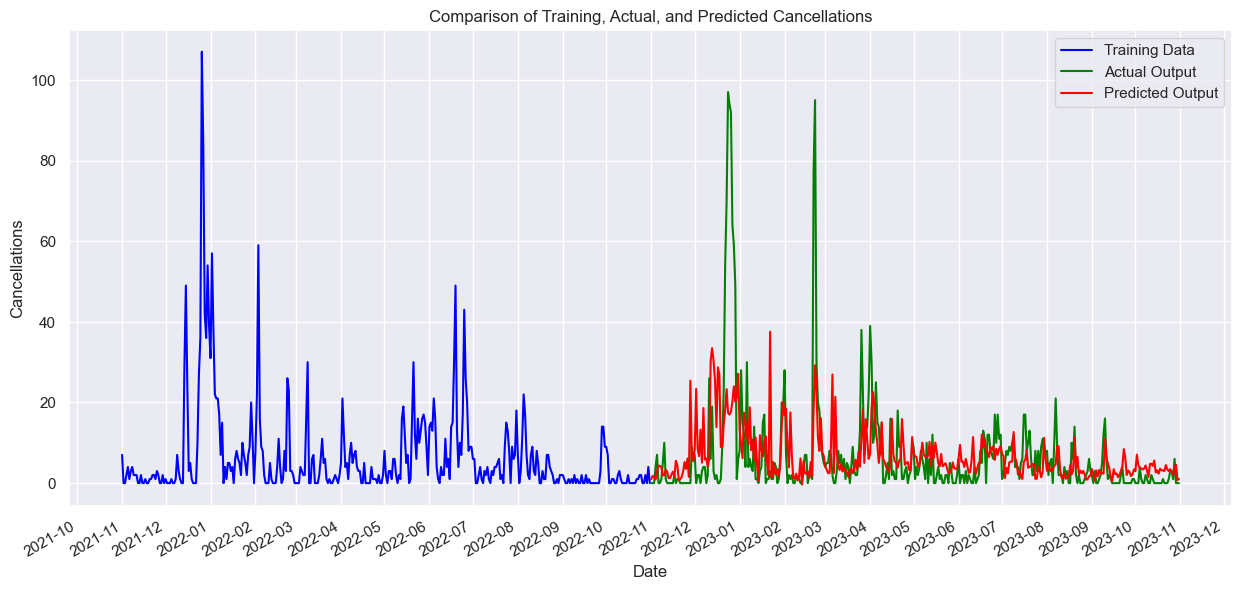

In [41]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

split_index = int(len(df_combined) * 0.5)


X_train = features.iloc[:split_index]
y_train = target.iloc[:split_index]
X_test = features.iloc[split_index:]
y_test = target.iloc[split_index:]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)


X_train['Date'] = df_combined.iloc[:split_index]['Date']
X_test['Date'] = df_combined.iloc[split_index:]['Date']
results_train = pd.DataFrame({
    'Date': X_train['Date'],
    'Cancellations': y_train
})
results_test = pd.DataFrame({
    'Date': X_test['Date'],
    'Actual Cancellations': y_test,
    'Predicted Cancellations': y_test_pred
})

results_train['Date'] = pd.to_datetime(results_train['Date'])
results_test['Date'] = pd.to_datetime(results_test['Date'])


plt.figure(figsize=(15, 7))
plt.plot(results_train['Date'], results_train['Cancellations'], label='Training Data', color='blue')
plt.plot(results_test['Date'], results_test['Actual Cancellations'], label='Actual Output', color='green')
plt.plot(results_test['Date'], results_test['Predicted Cancellations'], label='Predicted Output', color='red')
plt.title('Comparison of Training, Actual, and Predicted Cancellations')
plt.xlabel('Date')
plt.ylabel('Cancellations')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.show()


In [42]:
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)


rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 6.27629292827763
Mean Squared Error: 144.11476560312988
Root Mean Squared Error: 12.004780947736192


SHAP

c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


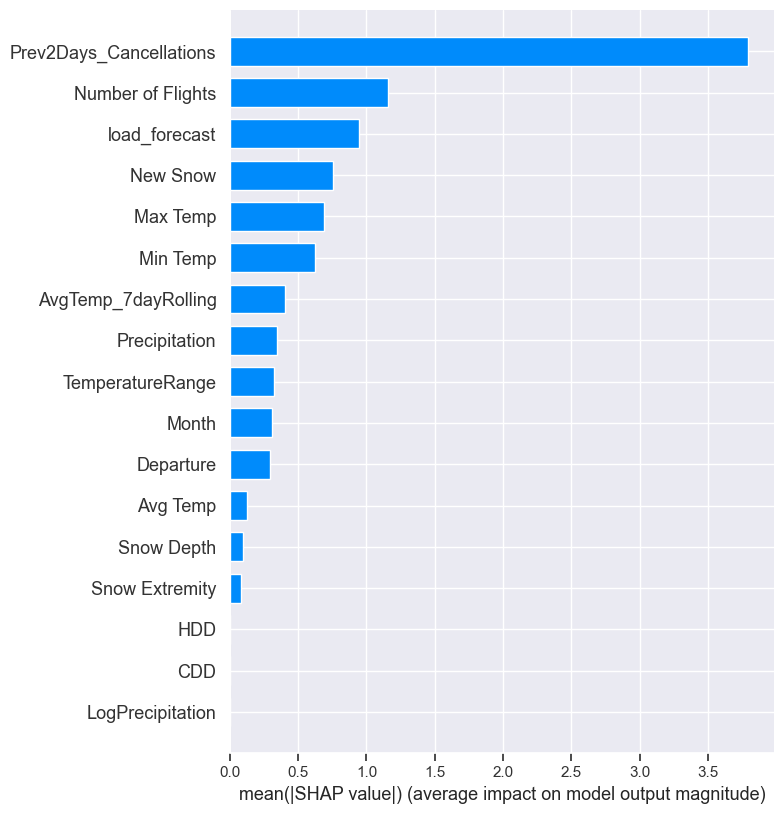

In [44]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled, feature_names=features.columns, plot_type="bar")

Checking the cancellation pattern 

Basic Descriptive Statistics:
count    730.000000
mean       6.695890
std       12.588915
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max      107.000000
Name: Cancellations, dtype: float64

Additional Statistics:
Median: 2.0
Mode: 0.0
Variance: 158.48077869853617
Skewness: 4.31557818445235
Kurtosis: 23.511009170065673

Missing Values:
0


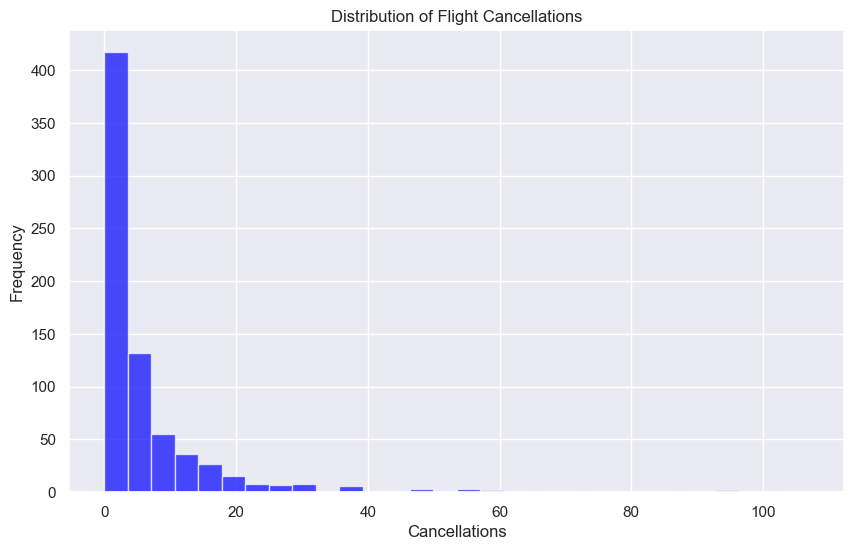

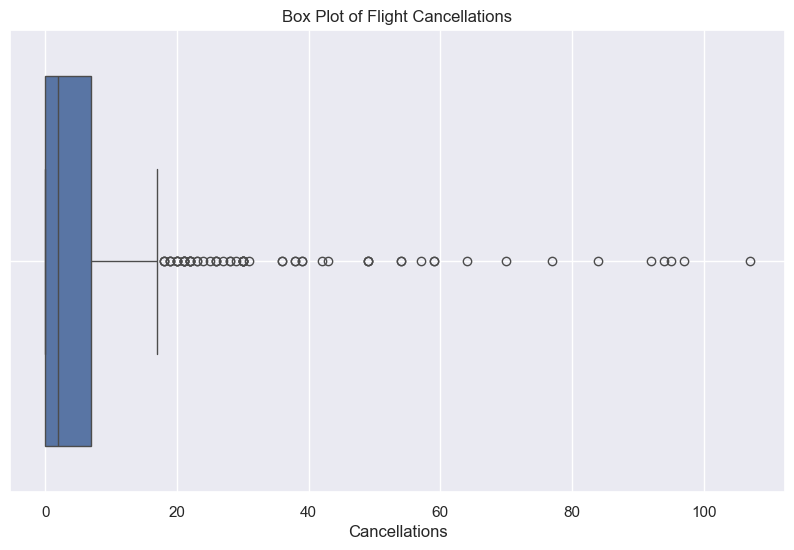

In [45]:

print("Basic Descriptive Statistics:")
print(df_combined['Cancellations'].describe())

print("\nAdditional Statistics:")
print("Median:", df_combined['Cancellations'].median())
print("Mode:", df_combined['Cancellations'].mode()[0])  
print("Variance:", df_combined['Cancellations'].var())
print("Skewness:", df_combined['Cancellations'].skew())
print("Kurtosis:", df_combined['Cancellations'].kurt())


print("\nMissing Values:")
print(df_combined['Cancellations'].isnull().sum())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_combined['Cancellations'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Flight Cancellations')
plt.xlabel('Cancellations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['Cancellations'])
plt.title('Box Plot of Flight Cancellations')
plt.xlabel('Cancellations')
plt.grid(True)
plt.show()


SARIMA

Stationarity check 

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

cancellations_series = df_combined['Cancellations']
result = adfuller(cancellations_series.dropna())  

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.512295
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


ADF Statistic: The value of 
−
8.512295
−8.512295 is significantly lower (more negative) than any of the critical values provided for the 1%, 5%, and 10% levels. This strongly suggests rejection of the null hypothesis.

p-value: A p-value of 
0.000000
0.000000 is effectively zero, which further supports the rejection of the null hypothesis. This indicates a very high confidence level that the series does not have a unit root.

Critical Values: Your ADF statistic compares favorably against all the critical values:

It is lower than 
−
3.439
−3.439 (1% level),
It is lower than 
−
2.866
−2.866 (5% level),
It is lower than 
−
2.569
−2.569 (10% level).

stationarity check if the mean and variance for particular portion of data is consistent

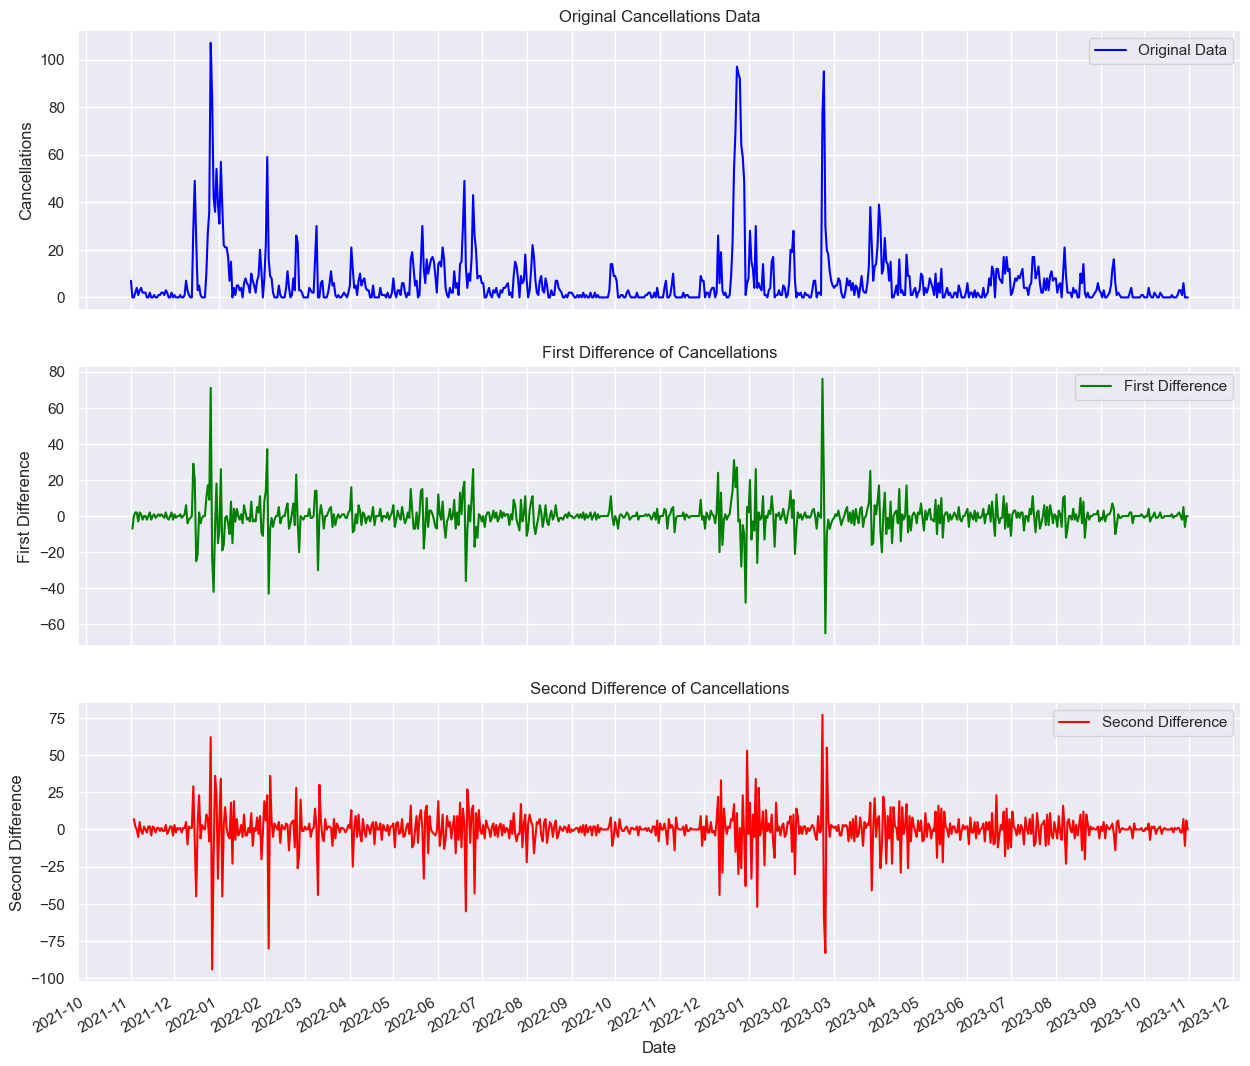

In [47]:


fig, axes = plt.subplots(3, 1, figsize=(15, 14), sharex=True) 
axes[0].plot(df_combined['Date'], df_combined['Cancellations'], label='Original Data', color='blue')
axes[0].set_title('Original Cancellations Data')
axes[0].set_ylabel('Cancellations')
axes[0].legend()


axes[1].plot(df_combined['Date'], df_combined['Cancellations'].diff(), label='First Difference', color='green')
axes[1].set_title('First Difference of Cancellations')
axes[1].set_ylabel('First Difference')
axes[1].legend()

axes[2].plot(df_combined['Date'], df_combined['Cancellations'].diff().diff(), label='Second Difference', color='red')
axes[2].set_title('Second Difference of Cancellations')
axes[2].set_ylabel('Second Difference')
axes[2].legend()

axes[2].xaxis.set_major_locator(mdates.MonthLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.show()

ACF, PACF

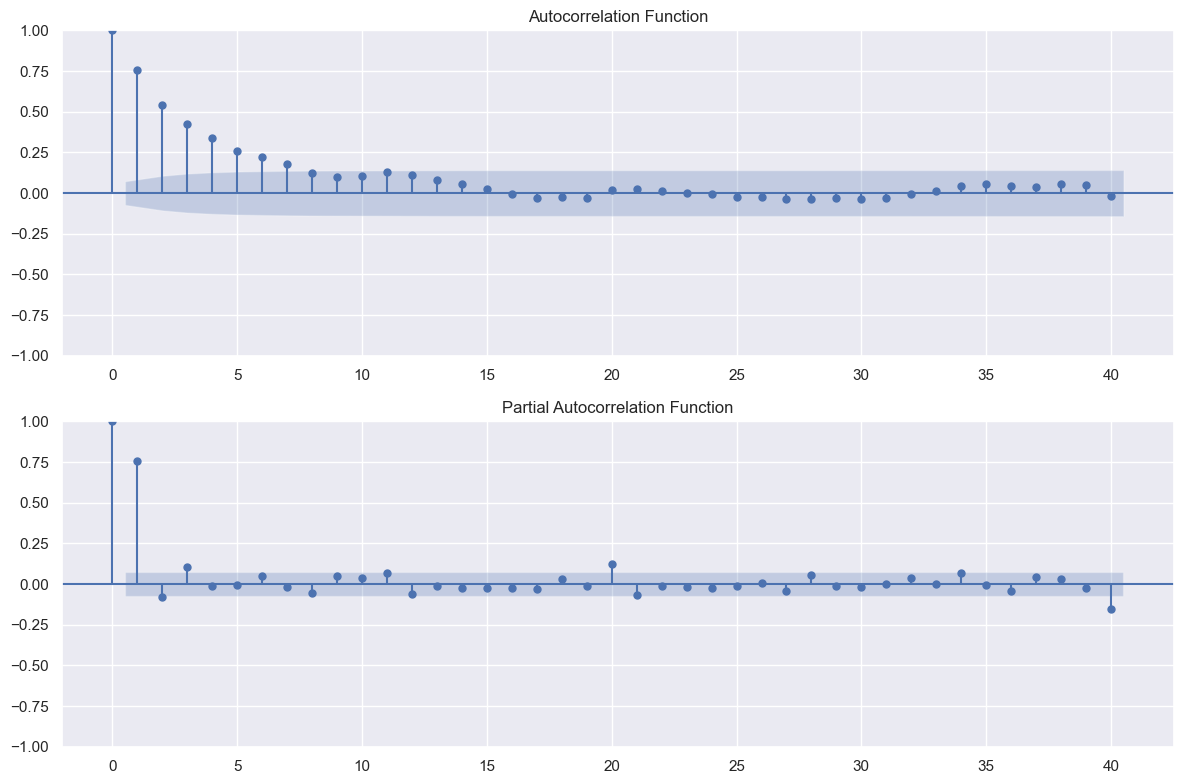

In [48]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))


sm.graphics.tsa.plot_acf(cancellations_series, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')


sm.graphics.tsa.plot_pacf(cancellations_series, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [49]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'])
df_combined.set_index('Date', inplace=True)

C:\Users\anikm\AppData\Local\Temp\ipykernel_26076\1010259502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Date'] = pd.to_datetime(df_combined['Date'])


Log transforming the cancellation since it has outliers and is skewed 

In [50]:
from scipy.special import inv_boxcox
from scipy import stats

#df_combined['Cancellations'] = np.log1p(df_combined['Cancellations'])


c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


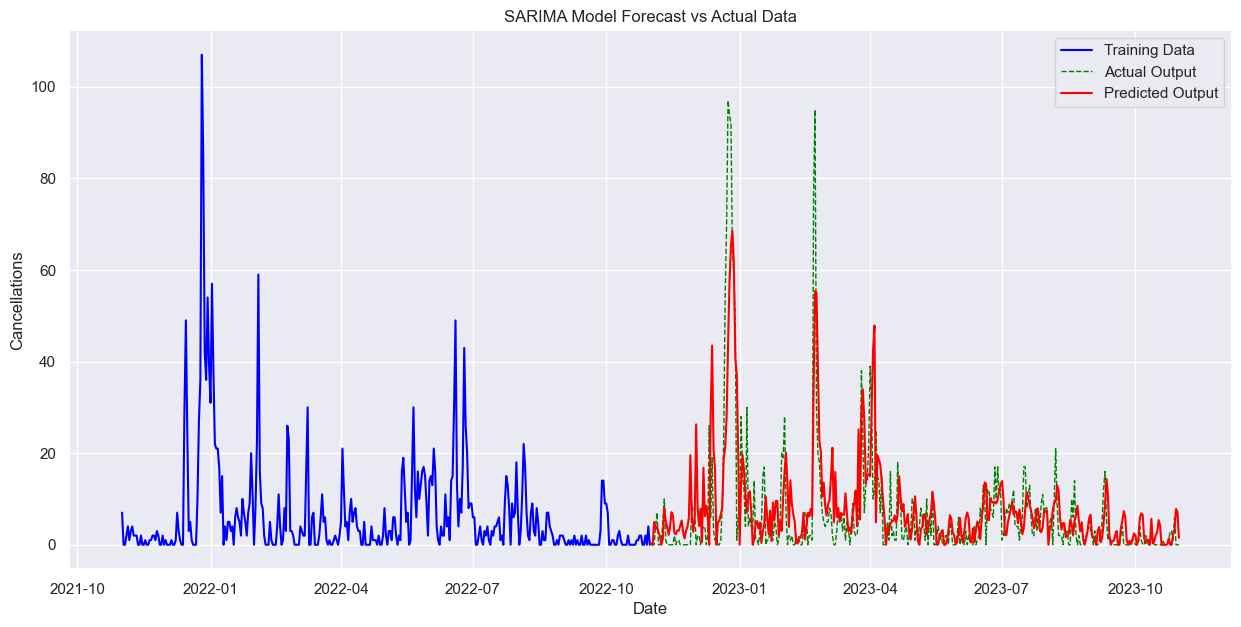

Training set Mean Absolute Error (MAE): 6.94
Training set Mean Squared Error (MSE): 119.28
Training set Root Mean Squared Error (RMSE): 10.92
Testing set Mean Absolute Error (MAE): 5.56
Testing set Mean Squared Error (MSE): 84.78
Testing set Root Mean Squared Error (RMSE): 9.21


In [51]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy


target = 'Cancellations'
features = ['Max Temp', 'Min Temp', 'Avg Temp', 'Departure', 'HDD', 'CDD',
       'Precipitation', 'New Snow', 'Snow Depth',
       'load_forecast', 'Month', 'TemperatureRange', 'LogPrecipitation',
       'AvgTemp_7dayRolling', 'Prev2Days_Cancellations', 'Snow Extremity']  

split_index = int(len(df_combined) * 0.5)
train = df_combined.iloc[:split_index]
test = df_combined.iloc[split_index:]

sarimax_model = sm.tsa.statespace.SARIMAX(train[target],
                                          exog=train[features],
                                          order=(2, 0, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
results = sarimax_model.fit()

predictions = results.predict(start=test.index[0], end=test.index[-1],
                              exog=test[features], 
                              dynamic=True)
predictions = predictions.clip(lower=0)

#predictions = predictions**2 # for square root transformation
#predictions = np.expm1(predictions) # for log transformation 




plt.figure(figsize=(15, 7))
plt.plot(train.index, train[target], label='Training Data', color='blue')
plt.plot(test.index, test[target], label='Actual Output', color='green', linewidth=1, linestyle='--')
plt.plot(predictions.index, predictions, label='Predicted Output', color='red')
plt.title('SARIMA Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Cancellations')
plt.legend()
plt.show()


############################################## might cause trouble 

predictions_train = results.predict(start=train.index[0], end=train.index[-1],
                              exog=train[features],  
                              dynamic=False)
predictions_train = predictions_train.clip(lower=0)

mae = mean_absolute_error(train[target], predictions)
mse = mean_squared_error(train[target], predictions)
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((train[target] - predictions) / train[target])) * 100

print(f'Training set Mean Absolute Error (MAE): {mae:.2f}')
print(f'Training set Mean Squared Error (MSE): {mse:.2f}')
print(f'Training set Root Mean Squared Error (RMSE): {rmse:.2f}')


###############################################


mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)  # or directly use np.sqrt(mean_squared_error(test[target], predictions))
mape = np.mean(np.abs((test[target] - predictions) / test[target])) * 100


print(f'Testing set Mean Absolute Error (MAE): {mae:.2f}')
print(f'Testing set Mean Squared Error (MSE): {mse:.2f}')
print(f'Testing set Root Mean Squared Error (RMSE): {rmse:.2f}')



LSTM

In [52]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.metrics import MeanAbsoluteError


features = df_combined[['Max Temp', 'Min Temp', 'Avg Temp', 'Departure', 'HDD', 'CDD',
                        'Precipitation', 'New Snow', 'Snow Depth', 'load_forecast', 
                        'Month', 'TemperatureRange', 'LogPrecipitation', 
                        'AvgTemp_7dayRolling', 'Prev2Days_Cancellations', 'Snow Extremity']]
target = df_combined['Cancellations']

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
feature_array = scaler_features.fit_transform(features)
target_array = scaler_target.fit_transform(target.values.reshape(-1, 1))  

split_idx = int(len(feature_array) * 0.5)  
train_features, test_features = feature_array[:split_idx], feature_array[split_idx:]
train_target, test_target = target_array[:split_idx], target_array[split_idx:]

n_input = 7
n_features = train_features.shape[1]

train_generator = TimeseriesGenerator(train_features, train_target, length=n_input, batch_size=10)
test_generator = TimeseriesGenerator(test_features, test_target, length=n_input, batch_size=10)

model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])



model.summary()


model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50)


predictions = model.predict(test_generator)

c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         2,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981 (11.64 KB)

 Trainable params: 2,981 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0763 - mean_absolute_error: 0.2199
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 3/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0847

c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\anikm\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - mean_absolute_error: 0.0993
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 - mean_absolute_error: 0.1207
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 - mean_absolute_error: 0.0960
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216 - mean_absolute_error: 0.0960
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205 - mean_absolute_error: 0.0911
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00
Epoch 13/50
3

Adjusted length of test_target: 358
Length of predictions: 358
Mean Squared Error: 123.83498466004977
Root Mean Squared Error: 11.128116851473559


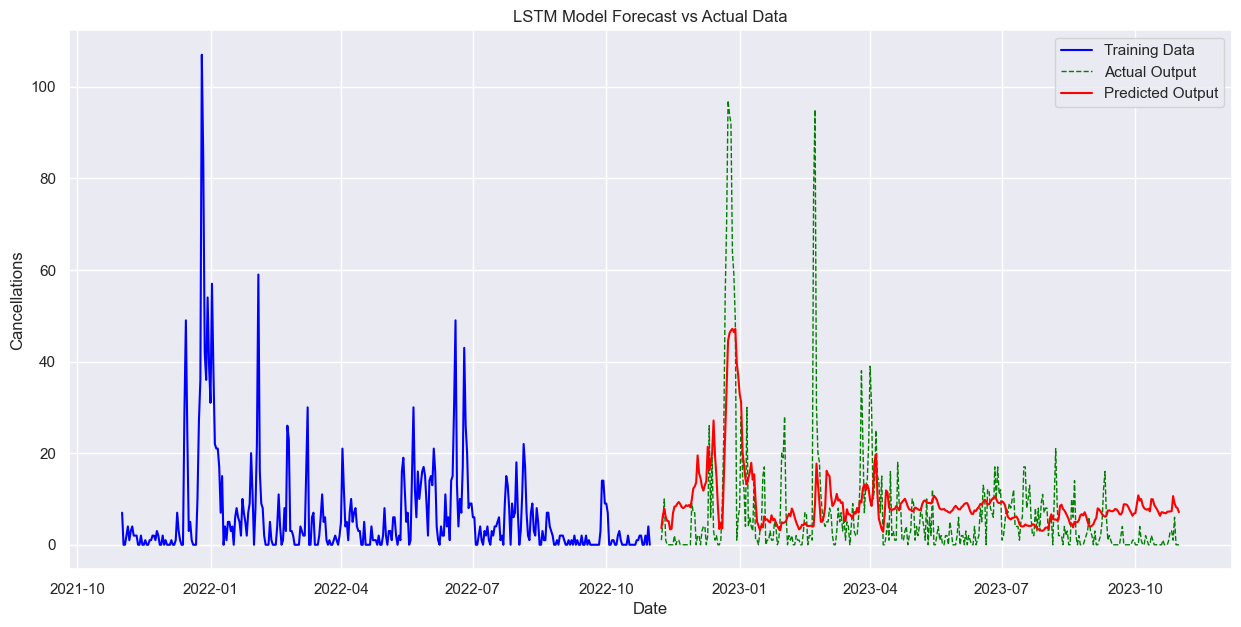

In [53]:

test_target_aligned = test_target[n_input:]  

print("Adjusted length of test_target:", len(test_target_aligned))
print("Length of predictions:", len(predictions))


test_target_inverted = scaler_target.inverse_transform(test_target_aligned)
predictions_inverted = scaler_target.inverse_transform(predictions)


mse = mean_squared_error(test_target_inverted, predictions_inverted)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

test_target_index = df_combined.index[split_idx + n_input:len(test_target_aligned) + split_idx + n_input]
predictions_index = test_target_index

test_target_indexed = pd.DataFrame(data=test_target_inverted, index=test_target_index)
predictions_indexed = pd.DataFrame(data=predictions_inverted, index=predictions_index)


plt.figure(figsize=(15, 7))
plt.plot(df_combined.index[:split_idx], scaler_target.inverse_transform(train_target), label='Training Data', color='blue')
plt.plot(test_target_indexed.index, test_target_indexed.iloc[:, 0], label='Actual Output', color='green', linewidth=1, linestyle='--')
plt.plot(predictions_indexed.index, predictions_indexed.iloc[:, 0], label='Predicted Output', color='red')
plt.title('LSTM Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Cancellations')
plt.legend()
plt.show()